# Allen-Cahn 1D Model

The Allen-Cahn equation is a widely studied partial differential equation that describes the process of phase separation. In 1D, without any external forces, the equation is given by:

$$ \frac{\partial \phi}{\partial t} = \epsilon^2 \frac{\partial^2 \phi}{\partial x^2} + \phi(1-\phi)(\phi - 0.5) $$

For the steady-state solution (where $ \frac{\partial \phi}{\partial t} = 0 $), a known analytical solution exists:

$$ \phi(x) = \frac{1}{2} \left(1 + \tanh\left(\frac{x}{\sqrt{2}\epsilon}\right)\right) $$

We will first solve the equation numerically and then compare the results with this analytical solution to validate our solver.

In the provided code, we first initialize the field $ \phi $ with values close to the steady-state solution. As the simulation progresses, this initial condition evolves according to the Allen-Cahn equation. The 'Numerical' line on the plot shows the solution as it evolves, while the 'Analytical' line represents the known analytical steady-state solution. Over time, the numerical solution should approach the analytical one. This overlap provides a good indication of the accuracy and correctness of the numerical solver.



# Derivation of the Steady-State Solution for the 1D Allen-Cahn Equation

The time-dependent Allen-Cahn equation in 1D is given by:
$ \frac{\partial \phi}{\partial t} = \epsilon^2 \frac{\partial^2 \phi}{\partial x^2} + \phi(1-\phi)(\phi - 0.5) $

For the steady-state solution, we set the time derivative to zero. This gives:
$ \epsilon^2 \frac{\partial^2 \phi}{\partial x^2} + \phi(1-\phi)(\phi - 0.5) = 0 $


We solve the equation by introducing a change of variables: $ z = \frac{x}{\epsilon} $. Then, the equation transforms to:
$ \frac{\partial^2 \phi}{\partial z^2} + 1.5\phi^2 - \phi^3 - 0.5\phi = 0 $

By integrating once, we arrive at:
$ \frac{\partial \phi}{\partial z} = C - \frac{\phi^3}{3} + 0.75\phi^2 - 0.5\phi $ with $ C $ an integration constant.

For the boundary conditions $\phi \to 0$ as $x \to -\infty$ (or equivalently $z \to -\infty$) and $\phi \to 1$ as $x \to \infty$ (or $z \to \infty$), the solution for the integration constant will depend on the specific problem setup and might require further numerical integration or specialized techniques.

However, the widely recognized analytical solution for the 1D Allen-Cahn equation, with the given double-well potential and boundary conditions, is:
$ \phi(z) = \frac{1}{2} \left(1 + \tanh\left(\frac{z}{\sqrt{2}}\right)\right) $

Returning to the original variable, we have:
$ \phi(x) = \frac{1}{2} \left(1 + \tanh\left(\frac{x}{\sqrt{2}\epsilon}\right)\right) $

Note: The derivation here assumes the double-well potential leads to the tanh profile, which is a common solution for the Allen-Cahn equation in certain conditions. The exact derivation is more involved and requires specialized mathematical techniques.

## Transforming the Phase Field Model into a Numerical Code with Finite Difference Methods

When dealing with a partial differential equation (PDE) in the context of phase field modeling, the problem starts with an equation that describes how a field (in this case, $ \phi $) evolves over time and space. This continuous problem needs to be discretized in time and space to be solved on a computer. The finite difference method provides a straightforward way to do this.

1. **Spatial Discretization**:

    We start by dividing the spatial domain into discrete points, or grid nodes. If you're working with a 1D problem, imagine marking points on a line at regular intervals, $ \Delta x $. For 2D, think of a grid of points separated by distances $ \Delta x $ and $ \Delta y $.

    In our code, `self.L` represents the length of the domain, and `self.dx` stands for the distance between these discrete points. The number of points is then `self.L / self.dx`.

2. **Temporal Discretization**:

    Time is similarly discretized. Instead of the continuous variable time $ t $, we consider discrete time steps, denoted $ \Delta t $. In the code, this is represented by `self.dt`.

3. **Approximating Derivatives**:

    The main challenge of discretizing PDEs is approximating derivatives. Finite difference methods provide formulas to estimate derivatives based on the values of $$ \phi $$ at the discrete points.

    - **First Derivative**:
        The forward difference formula for the first derivative can be given by:

        $$ \frac{\partial \phi}{\partial x} \approx \frac{\phi(x+\Delta x) - \phi(x)}{\Delta x} $$

    - **Second Derivative (Laplacian in 1D)**:
        The central difference formula for the second derivative is:

        $$ \frac{\partial^2 \phi}{\partial x^2} \approx \frac{\phi(x+\Delta x) - 2\phi(x) + \phi(x-\Delta x)}{\Delta x^2} $$

    In the code, the `laplacian_1d` function implements this approximation.

4. **Evolving in Time**:

    With spatial derivatives approximated, the PDE is converted into an update rule for each time step. In other words, given the field $ \phi $ at time $ t $, we can estimate its value at time $ t+\Delta t $.

    In the code, this update happens with the line:

    ```python
    self.phi += self.dt * self.gamma * self.laplacian_1d(mu)
    ```

    This line updates the value of $ \phi $ at each spatial point, advancing the solution by one time step.

5. **Boundary Conditions**:

    When using finite difference methods, we need to specify how to handle the domain boundaries. There are different types of boundary conditions: Dirichlet (set values), Neumann (set gradient), and more. In the provided code, Neumann boundary conditions (specifically, zero-gradient) are applied, meaning the phase field doesn't change across the boundary.

By following these steps, the continuous phase field PDE is translated into a discrete set of update rules which can be solved iteratively on a computer.


## Allen-Cahn 1D Phase Field Model - Code Explanation

1. **Initialization**:
    The phase field $ \phi $ is initialized around a profile resembling the steady state, with some small random fluctuations.

2. **g_prime**:
    This is the derivative of the double-well potential function. It captures the phase-separation tendency: values closer to 0 or 1 are energetically favorable, whereas values around 0.5 are not.

3. **laplacian_1d**:
    This function computes the Laplacian (second spatial derivative) of a field, which represents diffusion or smoothing.

4. **run_simulation**:
    The main loop evolves $ \phi $ over time. The evolution is driven by a competition between the double-well potential, which tries to force $ \phi $ to 0 or 1, and the Laplacian term, which acts to smooth $ \phi $.

5. **visualize**:
    At specified intervals, the simulation's state is plotted alongside the expected analytical solution.

In essence, this code captures the competition between phase separation (double-well potential) and smoothing (diffusion) over time. The `run_simulation` method evolves the phase field $ \phi $ using this balance, while `visualize` shows how the simulation's state compares to the expected solution.


Step: 0


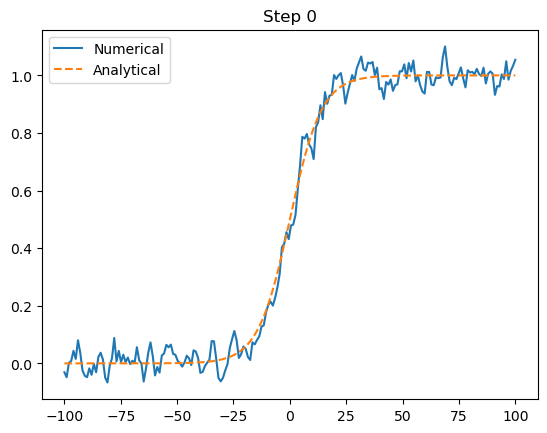

Step: 1000


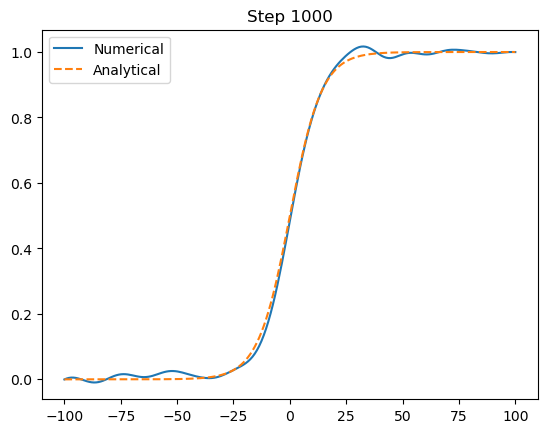

Step: 2000


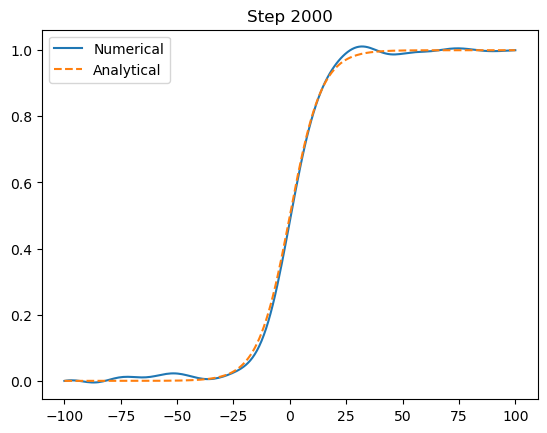

Step: 3000


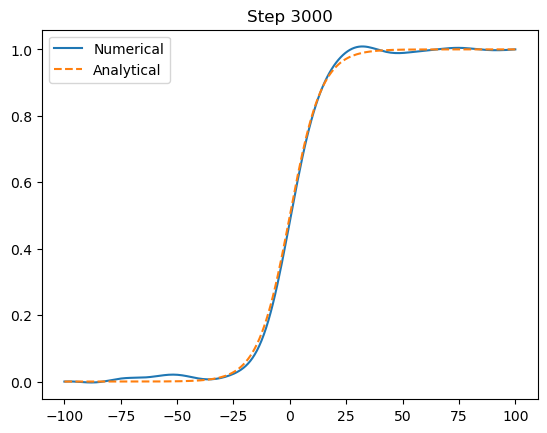

Step: 4000


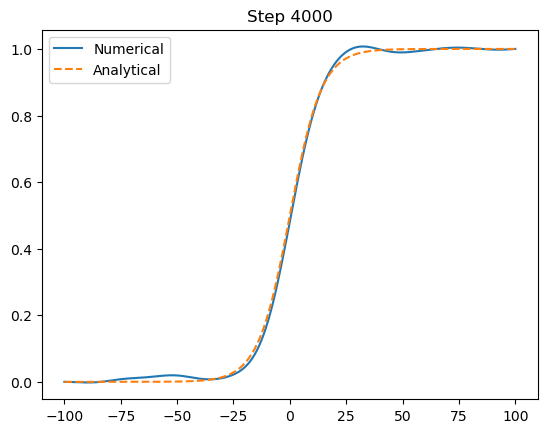

Step: 5000


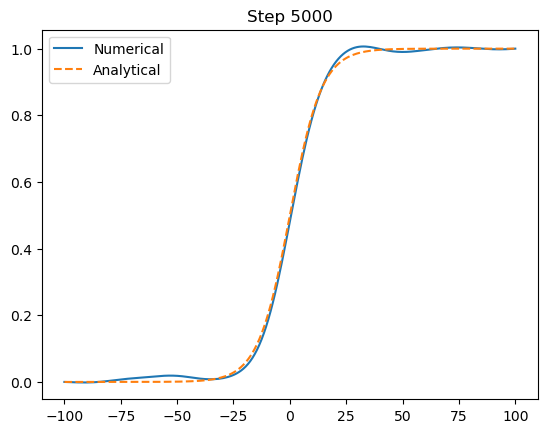

Step: 6000


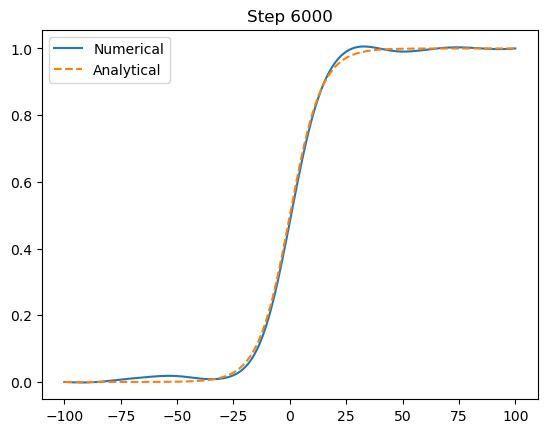

Step: 7000


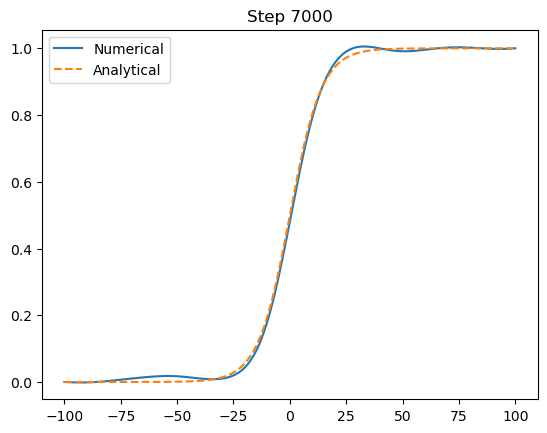

Step: 8000


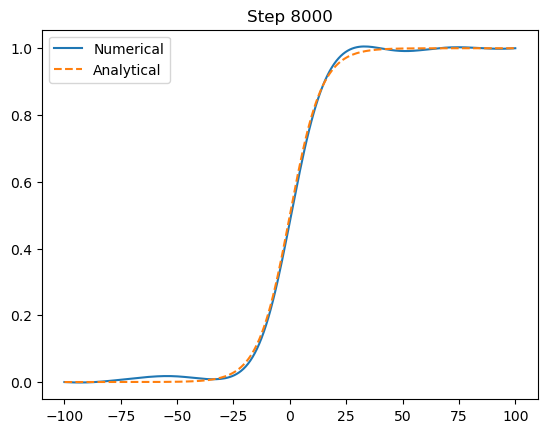

Step: 9000


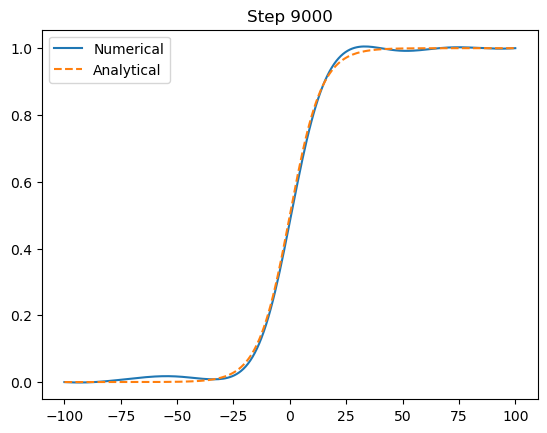

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class AllenCahn1D:
    def __init__(self, L=100, dx=1.0, dt=0.001, gamma=1.0, epsilon=2.0, tau=0.1, Nsteps=500, Nprint=50):
        # Domain length and grid parameters
        self.L = L
        self.dx = dx  # Grid spacing
        self.dt = dt  # Time step size
        self.gamma = gamma
        self.epsilon = epsilon
        self.tau = tau
        self.Nsteps = Nsteps  # Number of time steps
        self.Nprint = Nprint  # Printing frequency

        # Initialization of phi (phase field)
        # Start with values close to the steady-state solution and add a random perturbation
        x = np.linspace(-L/2, L/2, L)
        base_phi = 0.5 * (1 + np.tanh(x / (np.sqrt(2)*epsilon)))
        random_perturbation = 0.1 * (2 * np.random.rand(self.L) - 1)  # Random values between -0.1 and 0.1
        self.phi = base_phi + random_perturbation

        # boundary values
        self.left_boundary_value =  0.
        self.right_boundary_value = 1.

    def g_prime(self, phi):
        """
        Derivative of the double well potential with respect to phi.
        Represents the free energy difference.
        """
        return phi * (1 - phi) * (1 - 2*phi)

    def laplacian_1d(self, A):
        """
        Compute the Laplacian using a finite difference scheme.
        This gives the second derivative of the phase field.
        """
        lap = (np.roll(A, 1) + np.roll(A, -1) - 2*A) / self.dx**2

        # Apply Neumann boundary conditions (zero-flux at boundaries)
        lap[0] = lap[1]
        lap[-1] = lap[-2]
        return lap

    def relax_boundary(self):
        """
        Relax boundary values:
        This method updates the boundary values of \phi in a manner that pulls them towards the desired boundary values with a speed controlled by \tau.
        Smaller values of \tau will adjust the boundary more quickly towards the desired value.
        """
        self.phi[0] += (self.dt / self.tau) * (self.left_boundary_value - self.phi[0])
        self.phi[-1] += (self.dt / self.tau) * (self.right_boundary_value - self.phi[-1])

    def run_simulation(self):
        desired_left_boundary_value = 0  # for example
        desired_right_boundary_value = 1  # for example

        for step in range(self.Nsteps):
            mu = self.g_prime(self.phi) - self.epsilon**2 * self.laplacian_1d(self.phi)
            self.phi += self.dt * self.gamma * self.laplacian_1d(mu)

            self.relax_boundary()

            if step % self.Nprint == 0:
                print("Step:", step)
                self.visualize(step)
        plt.show()


    def visualize(self, step):
        """
        Plot the current state of the phase field along with the analytical solution.
        """
        x = np.linspace(-self.L/2, self.L/2, self.L)
        plt.plot(x, self.phi, label='Numerical')

        # Analytical solution
        analytical = 0.5 * (1 + np.tanh(x / (np.sqrt(2)*self.epsilon)))
        plt.plot(x, analytical, '--', label='Analytical')

        plt.legend()
        plt.title(f"Step {step}")
        plt.pause(0.1)

# Example usage:
simulator = AllenCahn1D(L=200, dx=1., dt=0.001, gamma=1.0, epsilon=10.0, tau=0.1, Nsteps=10000, Nprint=1000)
simulator.run_simulation()


# The primary evolution equation in the provided code is:

$$ \frac{\partial \phi}{\partial t} = \gamma \nabla^2 \left( \frac{\delta F}{\delta \phi} \right) $$

Where:

- $ \frac{\delta F}{\delta \phi} $ represents the variational derivative of the free energy functional with respect to $$ \phi $$. This term is also commonly referred to as the "chemical potential", $ \mu $.
  
- $ \nabla^2 $ is the Laplacian operator, representing the second spatial derivative.

- $ \gamma $ is a mobility coefficient, controlling the rate of change of the phase field variable $ \phi $.

Breaking down this rule:

1. **Chemical Potential, $ \mu $:**
$$ \mu = g'(\phi) - \epsilon^2 \nabla^2 \phi $$

   This chemical potential is a combination of:
   
   - $ g'(\phi) $: the derivative of the double-well potential. This captures the phase-separation tendency.
   - $ \epsilon^2 \nabla^2 \phi $: a gradient energy term. The Laplacian of $ \phi $ acts to smooth the phase field and the $ \epsilon^2 $ parameter adjusts the magnitude of this term.

2. **Phase Field Evolution:**
$$ \frac{\partial \phi}{\partial t} = \gamma \nabla^2 \mu $$

   The phase field $ \phi $ is evolved based on the Laplacian of the chemical potential scaled by the mobility coefficient $ \gamma $.

This update rule captures the competition between:

- Phase separation (induced by $ g'(\phi) $), trying to push $ \phi $ towards the values 0 or 1.
  
- Diffusion or smoothing (represented by the Laplacian terms), which act to smooth out the field $ \phi $.

The solution $ \phi $ is updated over time using an explicit finite difference method with a given time step `self.dt`, leveraging the competition between phase separation and diffusion.


# Allen-Cahn Phase-Field Model in 2D

The Allen-Cahn phase-field model is widely employed in computational materials science to describe the evolution of phase transitions. It's governed by a time-dependent partial differential equation (PDE) which captures the evolution of a phase-field variable $ \phi $ in time and space.

The PDE is:
$$ \frac{\partial \phi}{\partial t} = -\gamma \left( \frac{\delta F}{\delta \phi} \right) $$

Where:
- $ F $ is the free energy functional, typically given by $ F = \int_V \left[ \frac{\epsilon^2}{2} |\nabla \phi|^2 + g(\phi) \right] dV $
- $ g(\phi) $ is a double-well potential, usually chosen as $ g(\phi) = \frac{1}{4} \phi^2 (1 - \phi)^2 $
- $ \epsilon $ is a length scale parameter and $ \gamma $ is a mobility coefficient.
- The term $ \epsilon^2 |\nabla \phi|^2 $ penalizes gradients in the phase field and thus controls interface width, while $ g(\phi) $ defines the bulk free energy for the phases.


To capture the compact or dendritic surface, the initial condition, the parameters $ \epsilon $, and the mobility $ \gamma $ can be adjusted. The detailed behavior might also be influenced by the specific double-well potential used.

Note: The below is a basic implementation. A real-world scenario might require more sophisticated methods, including adaptive mesh refinement, better initial conditions, and so forth.


Step: 0


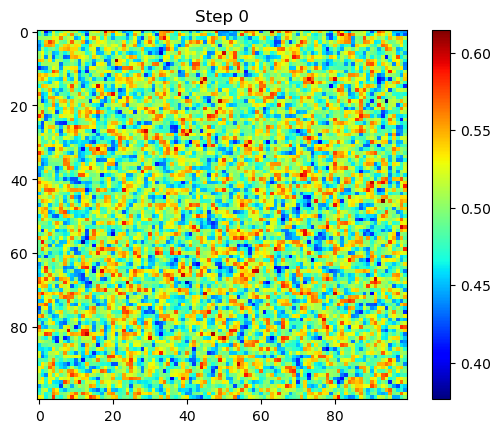

Step: 50


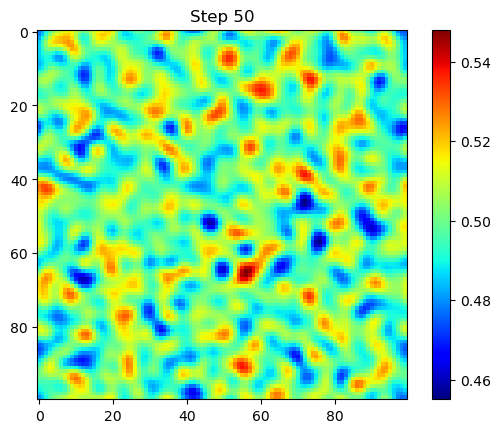

Step: 100


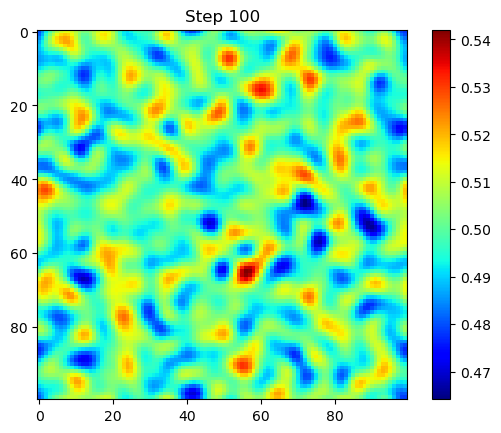

Step: 150


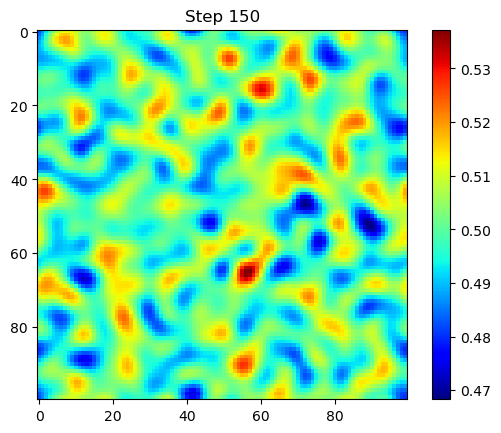

Step: 200


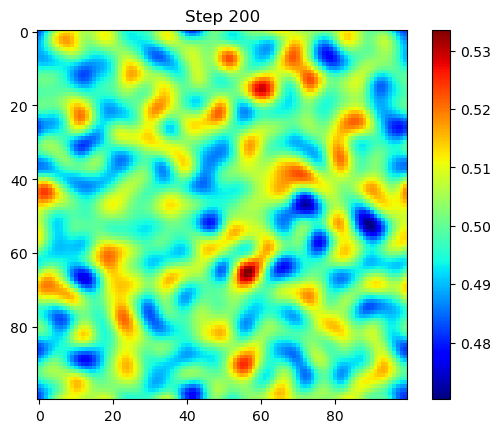

Step: 250


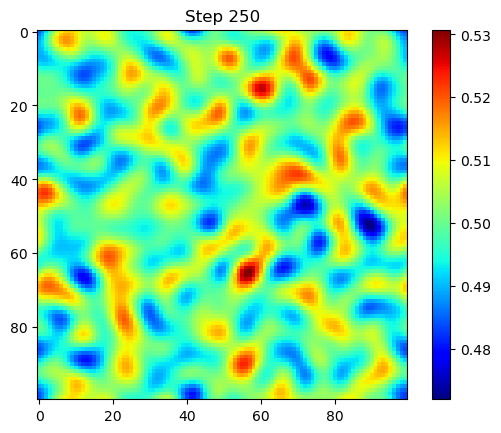

Step: 300


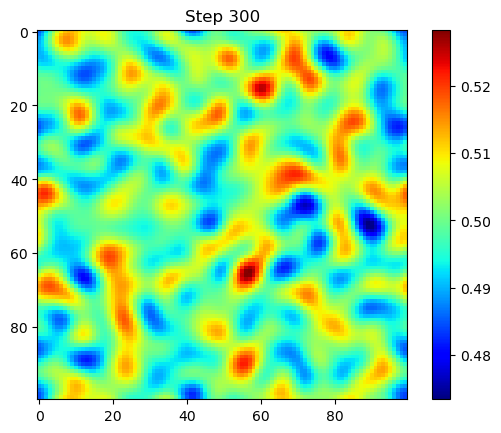

Step: 350


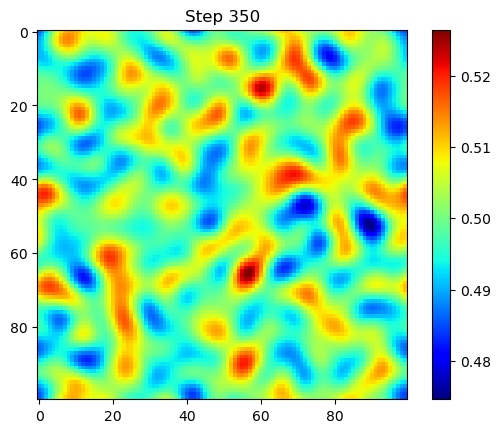

Step: 400


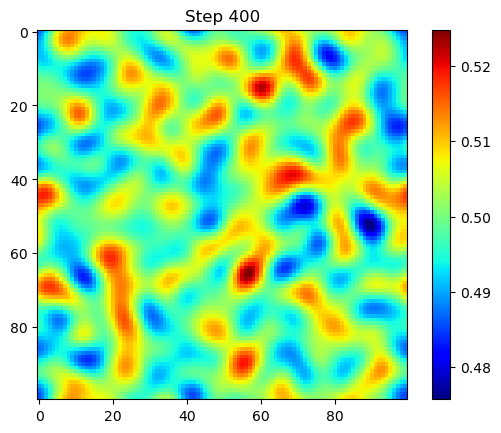

Step: 450


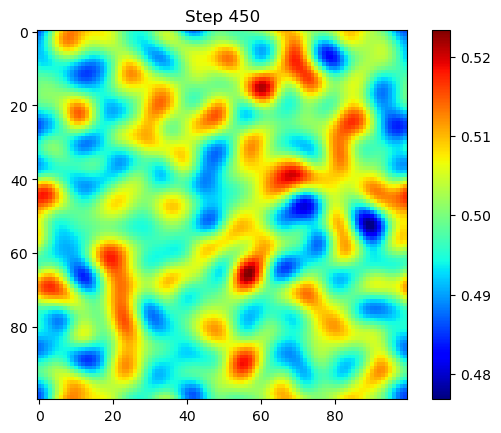

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class AllenCahn2D:
    def __init__(self, L=100, dx=1.0, dt=0.001, gamma=1.0, epsilon=2.0, Nsteps=500, Nprint=50):
        """
        Initialize the Allen-Cahn 2D simulator.

        Parameters:
            L: Size of the 2D domain (grid size in each dimension).
            dx: Grid spacing; distance between points in the simulation grid.
            dt: Time step; duration of each time increment in the simulation.
            gamma: Mobility coefficient.
            epsilon: Length scale parameter.
            Nsteps: Total number of time steps to be performed.
            Nprint: Frequency for outputting status.
        """
        self.L = L
        self.dx = dx
        self.dt = dt
        self.gamma = gamma
        self.epsilon = epsilon
        self.Nsteps = Nsteps
        self.Nprint = Nprint

        # Initialize phi with small random perturbations around 0.5.
        self.phi = np.random.uniform(0.4, 0.6, (L, L))

    def g_prime(self, phi):
        """Derivative of the double-well potential."""
        return phi * (1 - phi) * (1 - 2*phi)

    def laplacian(self, A):
        """Compute the Laplacian with periodic boundary conditions."""
        return (np.roll(A, 1, 0) + np.roll(A, -1, 0) + np.roll(A, 1, 1) + np.roll(A, -1, 1) - 4*A) / self.dx**2

    def run_simulation(self):
        """Execute the phase field simulation."""
        for step in range(self.Nsteps):
            mu = self.g_prime(self.phi) - self.epsilon**2 * self.laplacian(self.phi)
            self.phi += self.dt * self.gamma * self.laplacian(mu)

            if step % self.Nprint == 0:
                print("Step:", step)
                self.visualize(step)
        plt.show()

    def visualize(self, step):
        """Visualize the phase field at the given step."""
        plt.imshow(self.phi, cmap='jet')
        plt.colorbar()
        plt.title(f"Step {step}")
        plt.pause(0.1)


# Example usage:
simulator = AllenCahn2D(L=100, dx=1.0, dt=0.001, gamma=1.0, epsilon=5.0, Nsteps=500, Nprint=50)
simulator.run_simulation()


# Dendrite growth modeling
To model dendritic growth, especially in the context of the phase-field model, the key mechanism to capture is the preferential growth along certain directions.

Dendritic growth is commonly observed in metallurgical systems during solidification. When a melt solidifies, its free energy landscape can favor the growth of crystals in certain specific patterns or morphologies. One such morphology is the dendrite, where we see tree-like structures growing out from the solidifying front.

The model you provided is a generic 2D Allen-Cahn model. To make it more relevant to dendritic growth, one needs to:

***Anisotropy***: Incorporate anisotropic surface energy. This promotes the growth of the phase field in certain preferred directions.

***Noise***: Seed small fluctuations. This can be seen as mimicking the natural perturbations or noise in a real system which can become the seeds for dendrites to form.

***Thermal effects***: Often, the undercooling or supercooling of the system can play a significant role in dendrite formation. The temperature gradient can also influence the directionality of the growth.

The governing equation is a time-evolution equation for the phase field $ \phi $, which can be described by the following Cahn-Hilliard type equation:

$$ \frac{\partial \phi}{\partial t} = \gamma \nabla^2 \left( \epsilon^2 \nabla^2 \phi - g'(\phi) \right) $$

where:
- $ \phi $ is the phase field variable (ranging between 0 and 1, with 1 representing the solid phase and 0 representing the liquid phase).
- $ \gamma $ is the mobility coefficient.
- $ \epsilon $ is a length scale parameter that sets the width of the interface between solid and liquid.
- $ g'(\phi) $ is the derivative of the double-well potential function $ g(\phi) $, which is given by:
$$ g'(\phi) = \phi(1-\phi)(1-2\phi) $$
This potential function drives the system towards either the completely solid or completely liquid state.

Regarding the control parameter for morphology:

The control parameter that can influence the morphology of dendritic growth, in a more complete model, would be related to anisotropy, temperature gradients, solute partitioning, and undercooling. However, in the given basic model, you don't have these factors explicitly modeled.

Still, in many phase field simulations for dendritic growth:

- **Anisotropy**: Introducing anisotropy in the interfacial energy can result in different dendritic patterns. High anisotropy can promote tree-like dendritic growth, while lower values would tend to make growth more compact and isotropic.
  
The code currently lacks this anisotropy term, which you had previously mentioned. Including such anisotropy effects can provide a control parameter for the morphology.

By manipulating the parameters, especially an anisotropy term if added, you can transition from compact to tree-like morphologies. In your given system, manipulating the `growth_factor` might also have some effect on the growth pattern, but a more pronounced change in morphology would likely come from adding and controlling anisotropy.


## Phase-Field Model for Dendritic Growth with Anisotropy

### Model Overview:

The dendritic growth is modeled using the phase-field approach. The scalar phase field variable, $ \phi $, distinguishes between the solid ($\phi = 1$) and the liquid ($\phi = 0$) phases. The evolution of the $ \phi $ field is governed by the time-dependent Ginzburg-Landau equation, which can be written as:

$$ \frac{\partial \phi}{\partial t} = \gamma \left( \epsilon^2 \nabla^2 \mu + \mu \right) $$

where,
$$ \mu = g'(\phi) - \epsilon^2 \nabla^2 \phi $$

$g'(\phi)$ is the derivative of a double-well potential which stabilizes the values of $ \phi $ at 0 and 1, and $ \mu $ is the chemical potential.

### Anisotropy:

To introduce anisotropy, a direction-dependent term is added to the Laplacian operator in the equation. This term is a sinusoidal function based on the polar angle ($\theta$) with respect to the seed center, causing the growth to be faster or slower in certain directions.

### Parameters:

1. **L**: Grid size.
2. **dx**: Spatial resolution (distance between grid points).
3. **dt**: Time step for simulation.
4. **gamma**: Mobility coefficient. It controls how fast the phase field variable changes.
5. **epsilon**: Width of the interface. Smaller values create sharper interfaces.
6. **Nsteps**: Total number of simulation steps.
7. **Nprint**: Frequency of visualization.
8. **growth_factor**: Governs the growth rate of the structure.
9. **anisotropy**: Magnitude of the anisotropic effect. A higher value leads to stronger anisotropy.

### How to control the simulation:

1. **Growth Rate**: Modulate the `growth_factor` parameter. Higher values lead to faster growth.
2. **Anisotropy Direction and Strength**: Adjust the `anisotropy` parameter. A value of 0 means isotropic growth. A higher value will lead to stronger wiggles or branches.
3. **Sharpness of the Interface**: Adjust the `epsilon` parameter. Lower values lead to sharper interfaces.
4. **Speed of Evolution**: Modulate the `gamma` parameter.

### Anisotropic Laplacian:

The anisotropic Laplacian is computed by adding a direction-dependent term (wiggly_term) to the standard Laplacian:

$$ \text{anisotropic_laplacian} = \nabla^2 \phi + \text{anisotropy} \sin(m\theta) $$

Where,
$m$ is a constant determining the number of branches or fingers. In the code, $m = 6$.
$\theta$ is the polar angle with respect to the seed center.

Adjusting $m$ (inside the sin function) will change the number of "branches" or "fingers" you see.

### Initialization:

The phase field $\phi$ is initialized with a circular seed in the center and is perturbed with some random noise to break the symmetry and kickstart the growth.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class DendriticGrowth2D:
    def __init__(self, L=100, dx=1.0, dt=0.001,
                 gamma=1.0, epsilon=2.0,
                 Nsteps=500, Nprint=50,
                 growth_factor=0.5, anisotropy=0.1, nangle=4,
                 eta=0.01, rho=0.02):
        self.L = L
        self.dx = dx
        self.dt = dt
        self.gamma = gamma
        self.epsilon = epsilon
        self.Nsteps = Nsteps
        self.Nprint = Nprint
        self.eta = eta  # Stochastic noise strength
        self.rho = rho  # Stochastic growth probability between 0 and 1
        self.growth_factor = growth_factor
        self.nangle = nangle
        self.anisotropy = anisotropy
        self.radius = L / 5
        self.width_wiggle = self.L / 20  # Width of the wiggly region, can adjust based on preference


        # Initialize with a circular seed in the center
        x, y = np.meshgrid(np.linspace(0, L-1, L), np.linspace(0, L-1, L))
        center = L / 2
        distance_from_center = np.sqrt((x-center)**2 + (y-center)**2)

        # Introducing random noise to break the symmetry
        random_noise = np.random.normal(scale=0.0, size=(L, L))
        self.phi = np.where(distance_from_center < self.radius, 1.0 + random_noise, random_noise)
        self.x = x
        self.y = y

    def g_prime(self, phi):
        """Derivative of the double-well potential."""
        return phi * (1 - phi) * (1 - 2*phi)

    def laplacian(self, A):
        """Compute the Laplacian."""
        return (np.roll(A, 1, 0) + np.roll(A, -1, 0) + np.roll(A, 1, 1) + np.roll(A, -1, 1) - 4*A) / self.dx**2

    def anisotropic_radial(self):
        distance_from_center = np.sqrt((self.x-self.L/2)**2 + (self.y-self.L/2)**2)
        radial_function = np.exp(-(distance_from_center - self.radius)**2 / (2 * self.width_wiggle**2))
        return radial_function

    def anisotropic_laplacian(self, phi):
        """Compute an anisotropic Laplacian to model wiggly growth around the seed."""
        grad_phi = np.array(np.gradient(phi))
        theta = np.arctan2(self.y - self.L/2, self.x - self.L/2)
        # radial part
        radial_function = self.anisotropic_radial()
        # stochastic
        theta0 = np.pi*np.random.normal(loc=1., scale=np.pi*0.01) # reference - stochastic
        angle_noise = np.random.normal(scale=np.pi*0.01) # stochastic part
        # wiggle
        wiggly_term = self.anisotropy * radial_function * np.sin(self.nangle*(theta-theta0)+angle_noise)
        return self.laplacian(phi) + wiggly_term

    def apply_boundary_conditions(self):
        """Set the values at the boundary to zero (Dirichlet boundary conditions)."""
        self.phi[0, :] = 0
        self.phi[-1, :] = 0
        self.phi[:, 0] = 0
        self.phi[:, -1] = 0

    def relax_phi(self):
        """Relax values of phi that are outside the [0,1] range."""
        relaxation_strength = 0.1  # Can adjust based on preference
        self.phi[self.phi > 1.0] -= relaxation_strength * (self.phi[self.phi > 1.0] - 1.0)
        self.phi[self.phi < 0.0] -= relaxation_strength * self.phi[self.phi < 0.0]

    def stochastic_growth(self):
        """Stochastic growth around regions with phi close to 1 using numpy operations."""
        near_one = (self.phi > 0.8) & (self.phi < 1.1)  # Pixels with value close to 1

        # Identify neighbors using slicing and apply the stochastic growth
        right_neighbors = np.roll(near_one, shift=-1, axis=1)
        left_neighbors = np.roll(near_one, shift=1, axis=1)
        up_neighbors = np.roll(near_one, shift=-1, axis=0)
        down_neighbors = np.roll(near_one, shift=1, axis=0)

        # Potential growth regions
        potential_growth = right_neighbors | left_neighbors | up_neighbors | down_neighbors

        # Apply stochastic growth
        growth_prob = np.random.rand(self.L, self.L) < self.rho
        growth_regions = potential_growth & growth_prob & (self.phi < 0.8)

        self.phi[growth_regions] = 1


    def run_simulation(self):
        """Execute the phase field simulation."""
        for step in range(self.Nsteps):
            noise = self.eta * np.random.randn(self.L, self.L)  # Gaussian noise - stochastic component
            mu = self.growth_factor * self.g_prime(self.phi) - self.epsilon**2 * self.anisotropic_laplacian(self.phi)  + noise
            self.phi += self.dt * self.gamma * self.laplacian(mu)

            # Induce stochastic growth in the core
            self.stochastic_growth()

            # Relax phi values
            self.relax_phi()

            # Apply the boundary conditions
            self.apply_boundary_conditions()

            if step % self.Nprint == 0:
                print("Step:", step)
                self.visualize(step)
        plt.show()

    def visualize(self, step):
        """Visualize the phase field at the given step."""
        plt.imshow(self.phi, cmap='jet')
        plt.colorbar()
        plt.title(f"Step {step}")
        plt.pause(0.1)

    def polish_phi(self, threshold=0.8):
        """Set the values of phi to 1 if above a certain threshold, else set to 0."""
        self.phi[self.phi >= threshold] = 1.0
        self.phi[self.phi < threshold] = 0.0




Step: 0


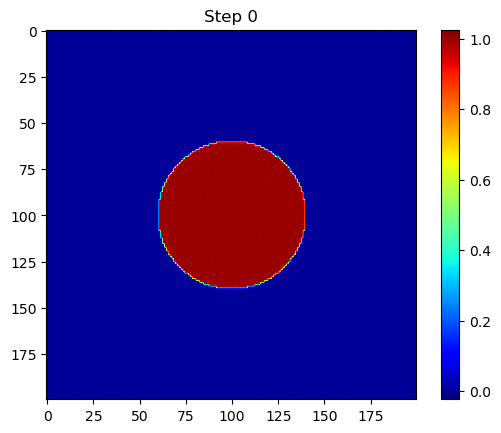

Step: 2000


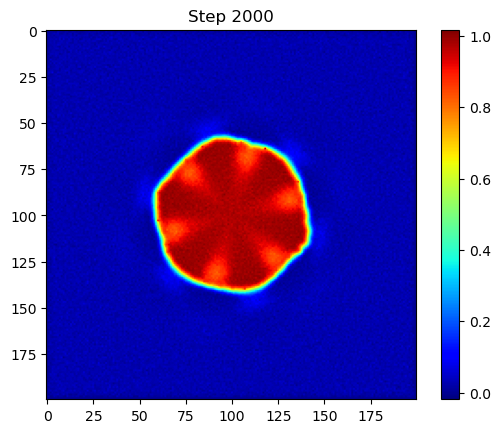

Step: 4000


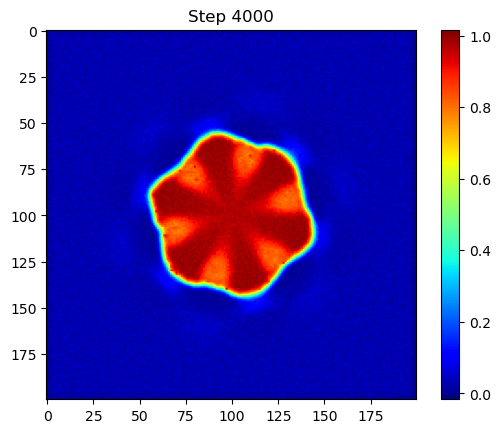

Step: 6000


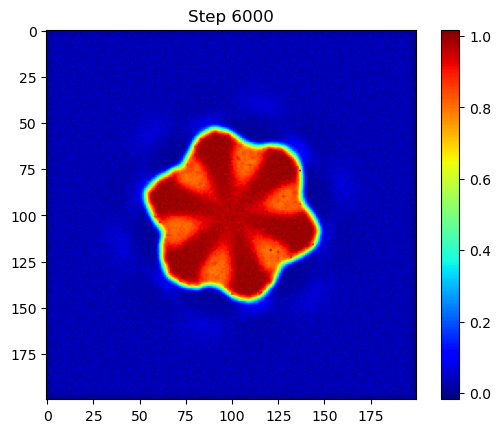

Step: 8000


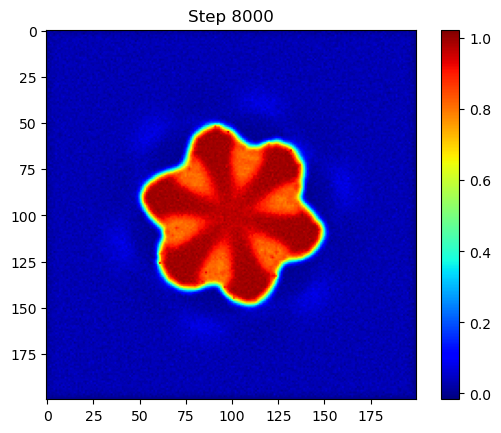

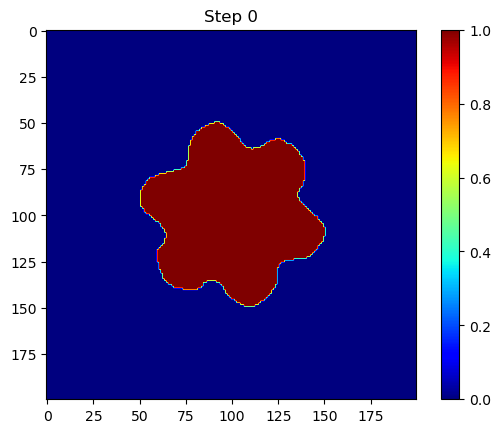

In [ ]:
# Example usage:
for anisotropy in [1.0]: #0.02,0.04,0.08,0.1,0.2]:
    simulator = DendriticGrowth2D(L=200, dx=1.0, dt=0.001, gamma=1., epsilon=2.0,
                                  Nsteps=10000, Nprint=2000,
                                  growth_factor=1., anisotropy=anisotropy, nangle=6
                                 , eta=1.,rho=0.002)
    simulator.run_simulation()
    # fill or erase the cells
    simulator.polish_phi(threshold=0.6)
    simulator.visualize(0)